In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import pandas  as pd

# 1. 데이터 준비
col_names = ['sepal-length', 'sepal-width','petal-length', 'petal-width','Class']

# csv 파일에서 DataFrame을 생성
dataset = pd.read_csv('c:\\data\\iris2.csv', encoding='UTF-8', header=None, names=col_names)
#print(dataset)

# DataFrame 확인
print(dataset.shape) # (row개수, column개수)
print(dataset.info()) # 데이터 타입, row 개수, column 개수, 컬럼 데이터 타입
print(dataset.describe()) # 요약 통계 정보

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000   

In [2]:
print(dataset.iloc[0:5]) # dataset.head()
print(dataset.iloc[-5:]) # dataset.tail()

# X = 전체 행, 마지막 열 제외한 모든 열 데이터 -> n차원 공간의 포인트
X = dataset.iloc[:,:-1].to_numpy() # DataFrame을 np.ndarray로 변환
#print(X)

# 전체 데이터 세트를 학습 세트(training set)와 검증 세트(test set)로 나눔
# y = 전체 행, 마지막 열 데이터
y = dataset.iloc[:, 4].to_numpy()
#print(y)

   sepal-length  sepal-width  petal-length  petal-width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
     sepal-length  sepal-width  petal-length  petal-width           Class
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


In [3]:

# 데이터 분리 
from sklearn.model_selection import train_test_split

# 전체 데이터 세트를 학습 세트(training set)와 검증 세트(test set)로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(len(X_train), len(X_test))

print(X_train[:3])
print(y_train[:3])



120 30
[[5.  2.  3.5 1. ]
 [5.1 3.8 1.5 0.3]
 [6.5 2.8 4.6 1.5]]
['Iris-versicolor' 'Iris-setosa' 'Iris-versicolor']


In [4]:
# 3. 거리 계산을 위해서 각 특성들을 스케일링(표준화)
# Z-score 표준화: 평균을 0, 표준편차 1로 변환

from sklearn.preprocessing import StandardScaler

# 3. 거리 계산을 위해서 각 특성들을 스케일링(표준화)
# Z-score 표준화: 평균을 0, 표준편차 1로 변환
scaler = StandardScaler() # Scaler 객체 생성
scaler.fit(X_train) # 스케일링(표준화)를 위한 평균과 표준 편차 계산
X_train = scaler.transform(X_train) # 스케일링(표준화 수행)
X_test = scaler.transform(X_test)

# 스케일링(z-score 표준화 수행 결과 확인)
for col in range(4):
    print(f'평균 = {X_train[:, col].mean()}, 표준편차= {X_train[:, col].std()}')
    
for col in range(4):
    print(f'평균 = {X_test[:, col].mean()}, 표준편차= {X_test[:, col].std()}')    


평균 = 3.4416913763379853e-15, 표준편차= 1.0
평균 = 3.745152336402195e-15, 표준편차= 1.0000000000000002
평균 = -5.033011044967376e-16, 표준편차= 1.0
평균 = -6.217248937900876e-16, 표준편차= 1.0000000000000002
평균 = 0.020368161843753153, 표준편차= 1.0420937625282416
평균 = -0.19816580751596774, 표준편차= 0.8172895094689272
평균 = 0.05728997790806529, 표준편차= 0.9524896326508745
평균 = 0.07233654043450034, 표준편차= 0.9226149734297693


In [10]:
# 4. 학습/예측(Training/Pradiction)
from sklearn.neighbors import KNeighborsClassifier

# k-NN 분류기를 생성
classifier = KNeighborsClassifier(n_neighbors=30)

In [11]:
# 분류기 학습
classifier.fit(X_train, y_train)

# 예측
y_pred= classifier.predict(X_test)
print(y_pred)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa']


In [12]:
#5. 모델 평가
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 8  0  0]
 [ 0 13  0]
 [ 0  1  8]]


In [13]:

# 대각선에 있는 숫자가 정답을 맞춘 것, 그 외가 틀린 것

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03333333333333333]


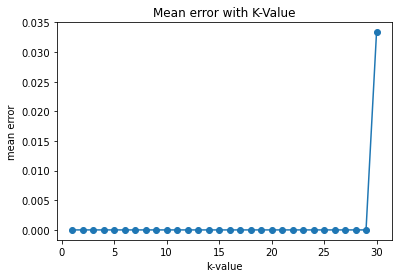

In [14]:
import numpy as np
    
# 6. 모델 개선 - k값을 변화시킬 때, 에러가 줄어드는 지
errors = []
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    errors.append(np.mean(pred_i != y_test))
print(errors)

# 여기서 에러가 가장 적은 것을 선택


import matplotlib.pyplot as plt

plt.plot(range(1, 31), errors, marker='o')
plt.title('Mean error with K-Value')
plt.xlabel('k-value')
plt.ylabel('mean error')
plt.show()

